### Distributions, Sampling, Central Limit Theorem, Standard Error

A population is an entire set of possible outcomes

We are interested in numerical properties of the population
- Satisfying conditions
- Average values
- Standard deviations

So we take `samples` which are subsets of the population and use their properties to infer those of the population
- With replacement: individual outcomes are independent
- Without replacement - a sample is a proper subset

Key Phenomenon:
- A random sample tends to exhibit the same properties as the population provided it is sufficiently large and reandom

A single experiment yields a single outcome
- Population in question is the set of all possible experiment outcomes
- Single outcome very unlikely to fully capture characteristics

Repreating experiments yields multiple independent outcomes

As # of experiments goes to infinity, mean of the experiments converges to the true mean of the population

Empirical Rule
- If we assume that distribution of the errors in the estimates in normal (Gaussian) with a mean of zero

Then, by computing mean (mu) and standard deviation (sigma)
- 68% within 1 standard deviation
- 95% within 1.96 std devs
- 99.7% within 3 st devs

Common to use 95%
- mu +- 1.96 * sigma

The variation across multiple outcomes forms a sampling distribution
- the more results, the better the estimate

- We can quantify our certaintity in how accurate our sample mean is
- - Requires calculation of the standard deviation

This is difficult to do if each trial is expensive
- Also, not all distributions are normal

**The Importance of Means**
- If the sample is random we can estimate a confidence interval based on
- - Size of sample
- - Standard deviation of population from which sample is drawn



#### Random Variables and Distributions

A random variable X reflects the potential outcomes x of an experiment

Parameters + randomness --> output

Random variables can take on discrete or continuous values
The distribution of possible outcomes forms the probability distribution of a random variable

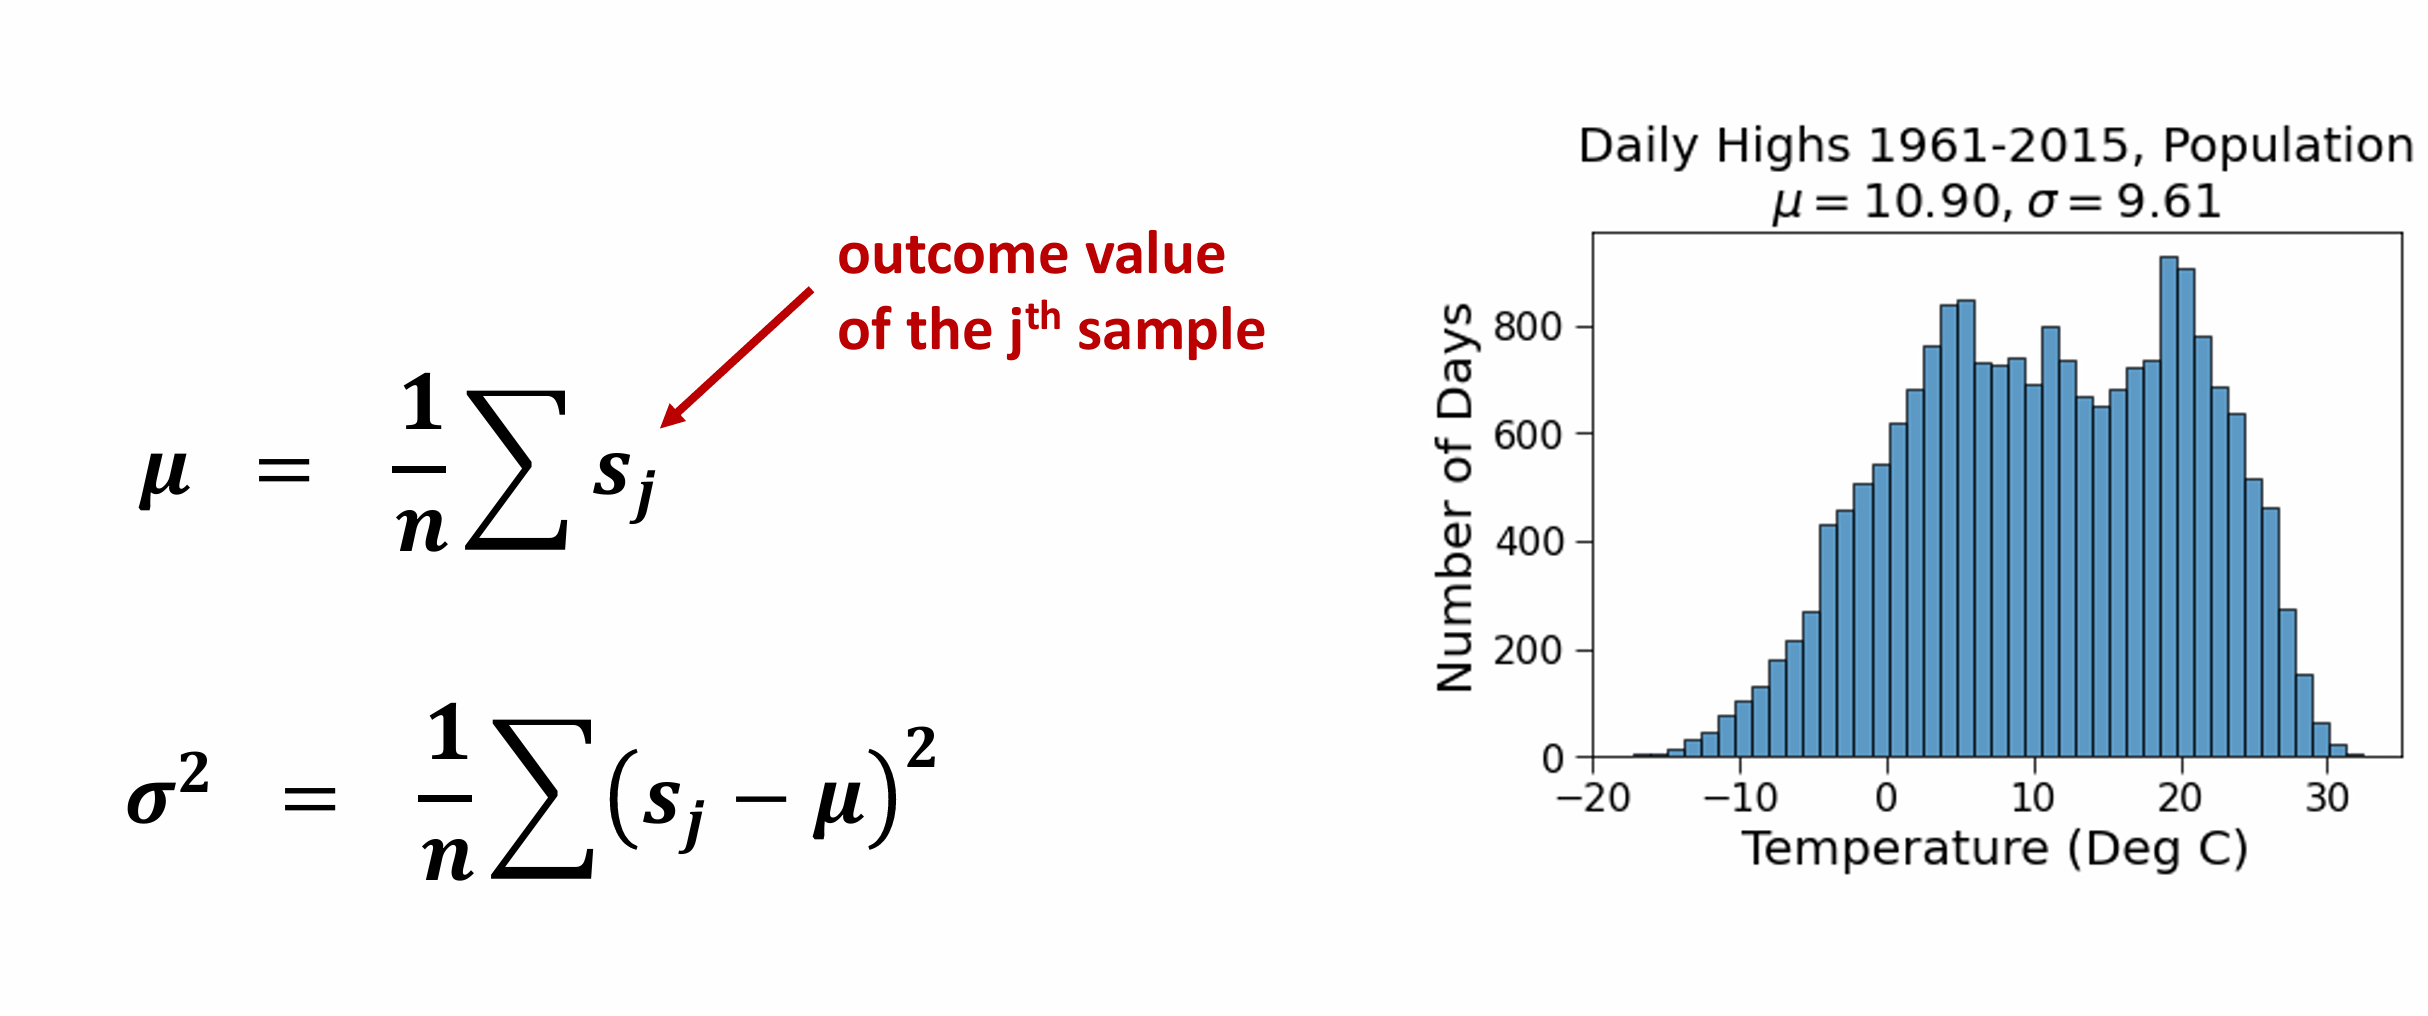

We've seen distributions of empirical data sets
Given a data set, we can calculate mean and variance

As n increases --> the barplot of days versus temperature approaches the probability distribution 
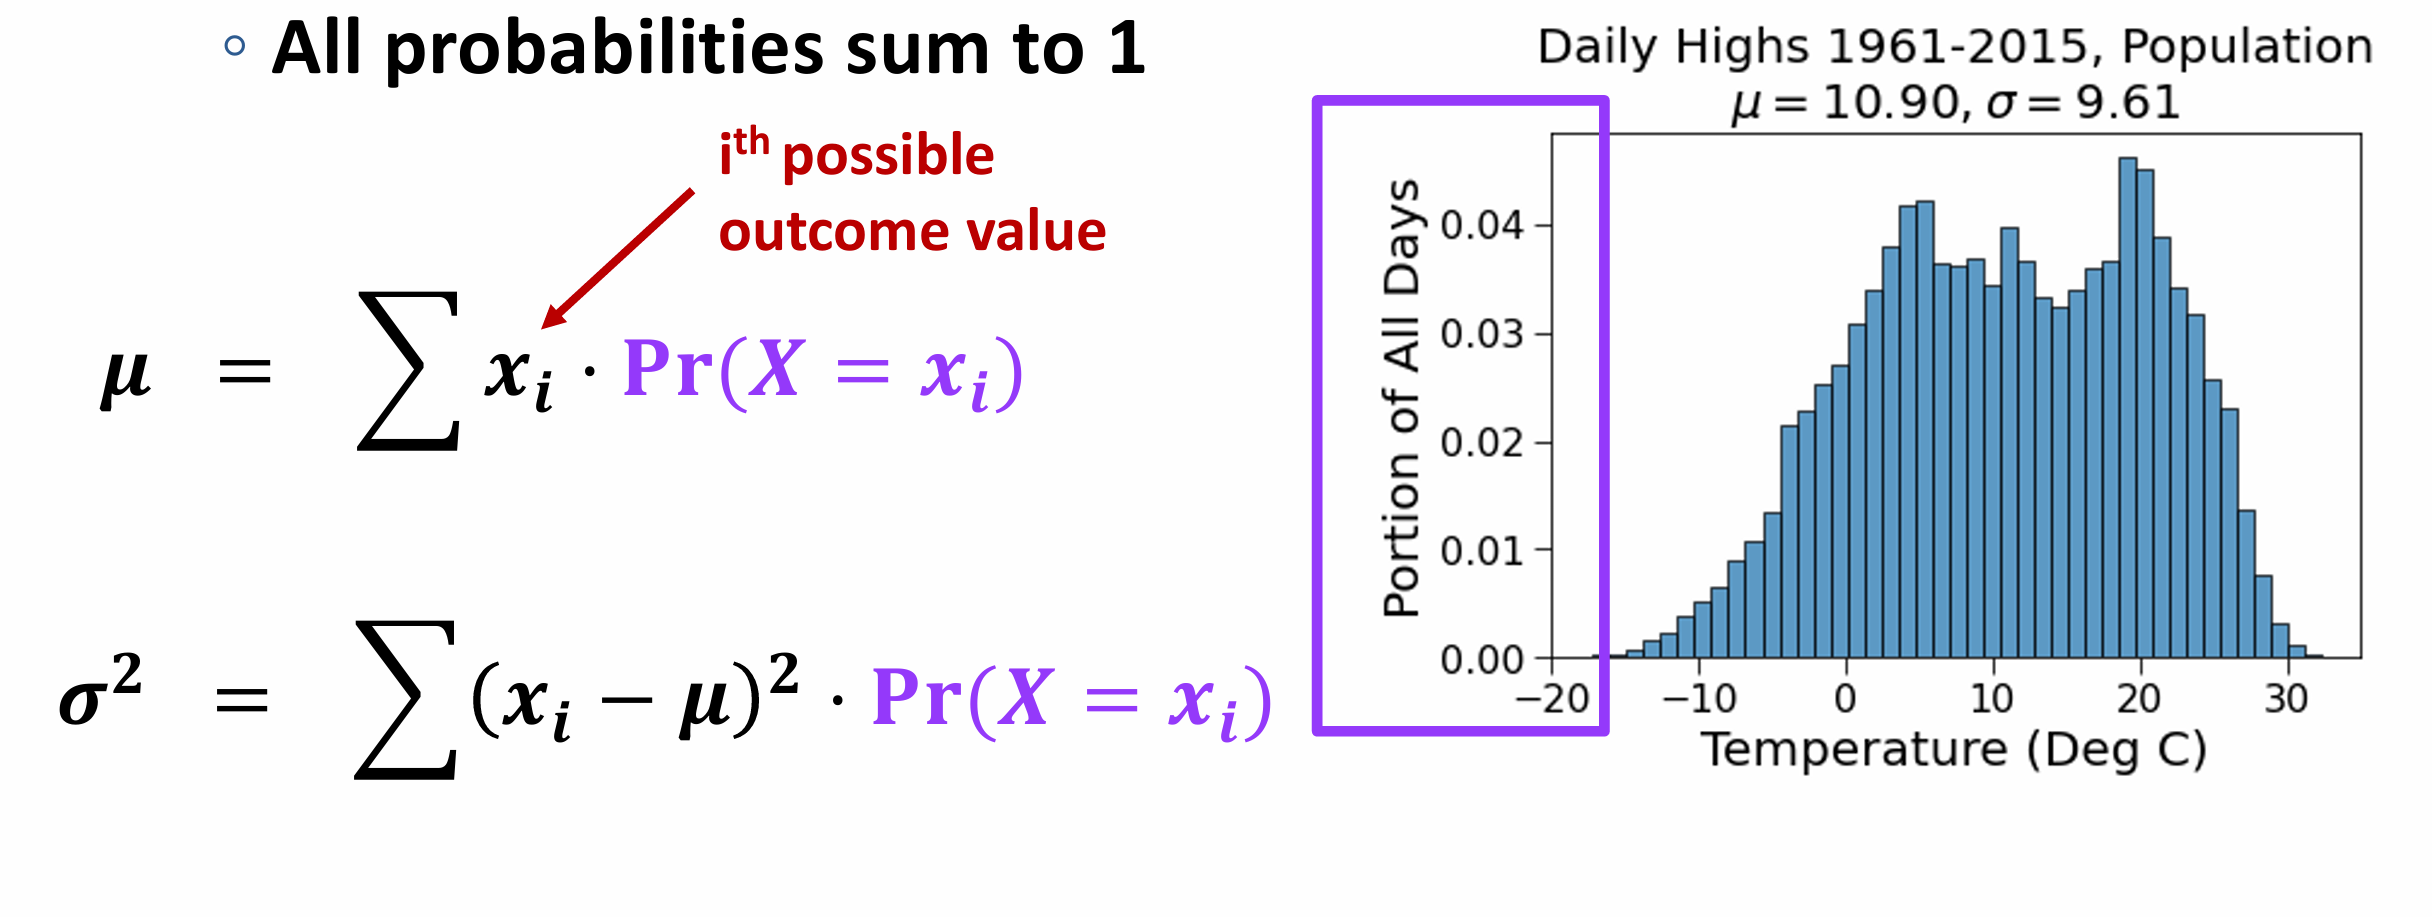

***Uniform Distribution***
- Equal probability for all integer outcomes within lower and upper bounds [a, b]

Pr(x) = 1/n on interval. . . 0 elsewhere
mu = (a + b) / 2
variance = (n^2 - 1) / 12



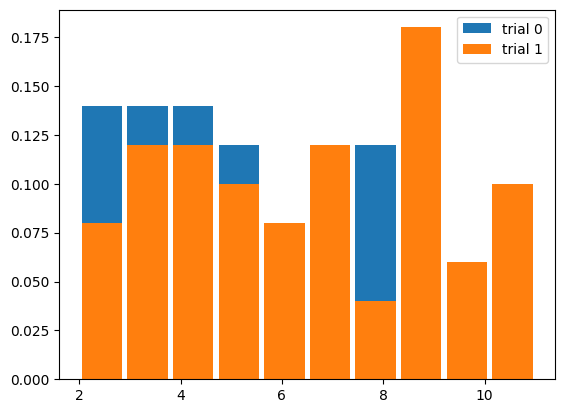

In [2]:
a, b = 2, 11
import random
import matplotlib.pyplot as plt
import numpy as np
num_samples = 50
for trial in range(2):
    uniform_vals = [random.randint(a, b) for _ in range(num_samples)]
    counts, bins = np.histogram(uniform_vals, bins = b-a+1)
    prob_dist = counts / num_samples

    x_vals = [(bins[i] + bins[i-1]) / 2 for i in range(1, len(bins))]
    plt.bar(x_vals, prob_dist, label=f'trial {trial}')
    plt.legend()

Np.histogram returns x and y axes of a histogram (this gets us the number of times each int in the range is sampled)

divide each count by number of samples to get probability

Bins is one element longer than counts because it takes two value to define the range of each bin


**Uniform Distribution (continuous)**

f(x) = 1 / (b - a)

mu = (a + b) / 2
variance = (b - a)^2 / 12



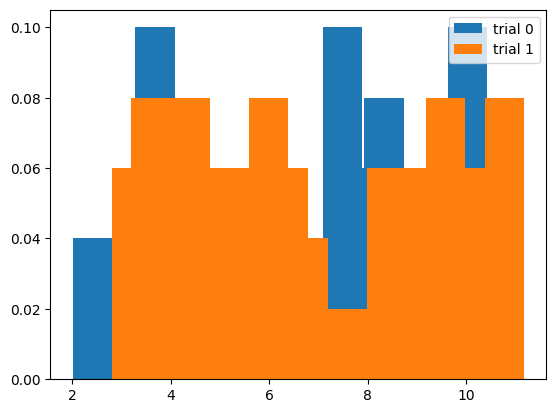

In [3]:
num_samples = 50
for trial in range(2):
    uniform_vals = [random.uniform(a, b) for _ in range(num_samples)]
    counts, bins = np.histogram(uniform_vals, bins = 2*(b-a+1))
    prob_dist = counts / num_samples

    x_vals = [(bins[i] + bins[i-1]) / 2 for i in range(1, len(bins))]
    plt.bar(x_vals, prob_dist, label=f'trial {trial}')
    plt.legend()

Uniform distribution examples:
- COin flipping
- Dice rolling
- Roulette pocket
- Arrival of bus


<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\s'
C:\Users\liamw\AppData\Local\Temp\ipykernel_36600\345140680.py:11: SyntaxWarning: invalid escape sequence '\m'
  plt.title(f'Normal distribution with $\mu={mu}$ and $\sigma = {sigma}$')
C:\Users\liamw\AppData\Local\Temp\ipykernel_36600\345140680.py:11: SyntaxWarning: invalid escape sequence '\s'
  plt.title(f'Normal distribution with $\mu={mu}$ and $\sigma = {sigma}$')


Text(0.5, 1.0, 'Normal distribution with $\\mu=20$ and $\\sigma = 3$')

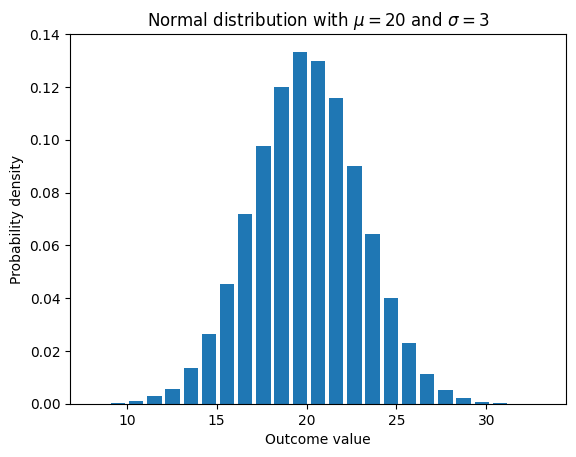

In [4]:
mu, sigma = 20, 3
num_samples = 100_000
num_bins = 25
normal_vals = [random.gauss(20, 3) for _ in range(num_samples)]
counts, bins = np.histogram(normal_vals, bins = num_bins)
prob_dist = counts/num_samples
x_vals = [(bins[i] + bins[i-1])/2 for i in range(1, len(bins))]
plt.bar(x_vals, prob_dist)
plt.xlabel('Outcome value')
plt.ylabel('Probability density')
plt.title(f'Normal distribution with $\mu={mu}$ and $\sigma = {sigma}$')

Nice mathematial properties
- symmetric about mean
- mean = median = mode
- area under curve is 1
- density is infinitely differentiable
- Unimodal



***Exponential Distribution***

- Describes time between events where events happen continuously and independently at a rate lambda
- Events occur every 1/lambda steps on average

Sample using random.expovariate(lamd)

f(x) = lambda * e^(-lambda * x)

mu = 1/lambda

variance = 1/lambda^2

Examples:
- modeling inter-arrival times (time between events)
- - Cars on a highway
- - Requests on a webpage
- Time for a radioactive particle to decay
- Service time of agents in a system






<>:12: SyntaxWarning: invalid escape sequence '\l'
<>:12: SyntaxWarning: invalid escape sequence '\l'
C:\Users\liamw\AppData\Local\Temp\ipykernel_36600\494740442.py:12: SyntaxWarning: invalid escape sequence '\l'
  plt.title(f'Exponential distribution with $\lambda={lam}$')


Text(0.5, 1.0, 'Exponential distribution with $\\lambda=0.5$')

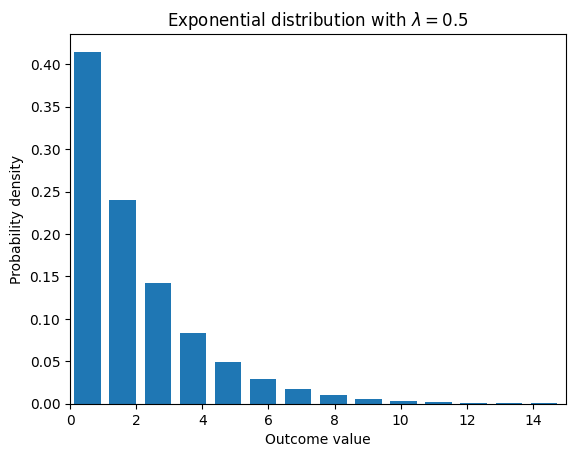

In [5]:
lam = 0.5
num_samples = 100_000
num_bins = 25
exp_vals = [random.expovariate(lam) for _ in range(num_samples)]
counts, bins = np.histogram(exp_vals, bins = num_bins)
prob_dist = counts/num_samples
x_vals = [(bins[i] + bins[i-1])/2 for i in range(1, len(bins))]
plt.bar(x_vals, prob_dist)
plt.xlim(0, 15)
plt.xlabel('Outcome value')
plt.ylabel('Probability density')
plt.title(f'Exponential distribution with $\lambda={lam}$')


**Bernoulli Distribution**
- Describes outcome of a single trial with a 0/1 outcome
- - Each coin flip has a probability p of success
- - Hence a probability 1-p of failure

mu = p

variance = p * (1 - p)

p = 0.5 has highest variance, less as you go towards 0 and 1

Text(0, 0.5, 'Number of Occurrences')

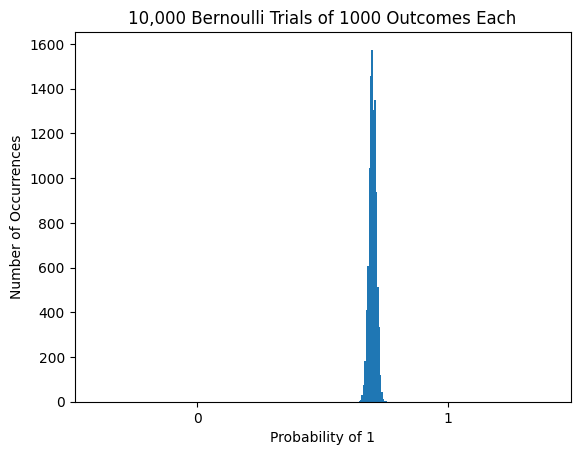

In [6]:
def bernoulli(num_samples, num_bins, prob, plot = True):
    bern_vals = [random.choices([0, 1], weights=[1-prob, prob], k=num_samples)]
    counts, bins = np.histogram(bern_vals, bins = num_bins)
    prob_dist = counts/num_samples
    if plot:
        plt.bar((0, 1), prob_dist)
        plt.xticks((0, 1))
        plt.xlabel('Outcome value')
        plt.ylabel('Probability density')
        plt.title(f'Bernoulli distribution with prob = {prob}')
    return prob_dist

bernoulli(1000, 2, 0.3)

ones = []
for _ in range(10_000):
    ones.append(bernoulli(1000, 2, 0.3, plot = False)[0])
plt.hist(ones, bins = 20)
plt.title('10,000 Bernoulli Trials of 1000 Outcomes Each')
plt.xlabel('Probability of 1')
plt.ylabel('Number of Occurrences')

Binomial distribution
- Discrete probability distribution of a set of Bernoulli trials



#### Central Limit Theorem and Standard Error

Estimating average die roll
- The outcome of a die roll follows a discrete uniform distribution of numbers 1-6
- Therefore we know the mean roll value is 3.5
- How many samples do we need to estimate this?

Such a sample is drawn directly from a uniform distribution

If we roll 2 dice and sum, it is no longer uniform (one way to form the sums of 2 and 12 but 6 ways to form 7)

As we roll more the distirbutioon of the sum is a truncated gaussian

In this case, sigma has been increasing faster than mu, so distribution appears narrower
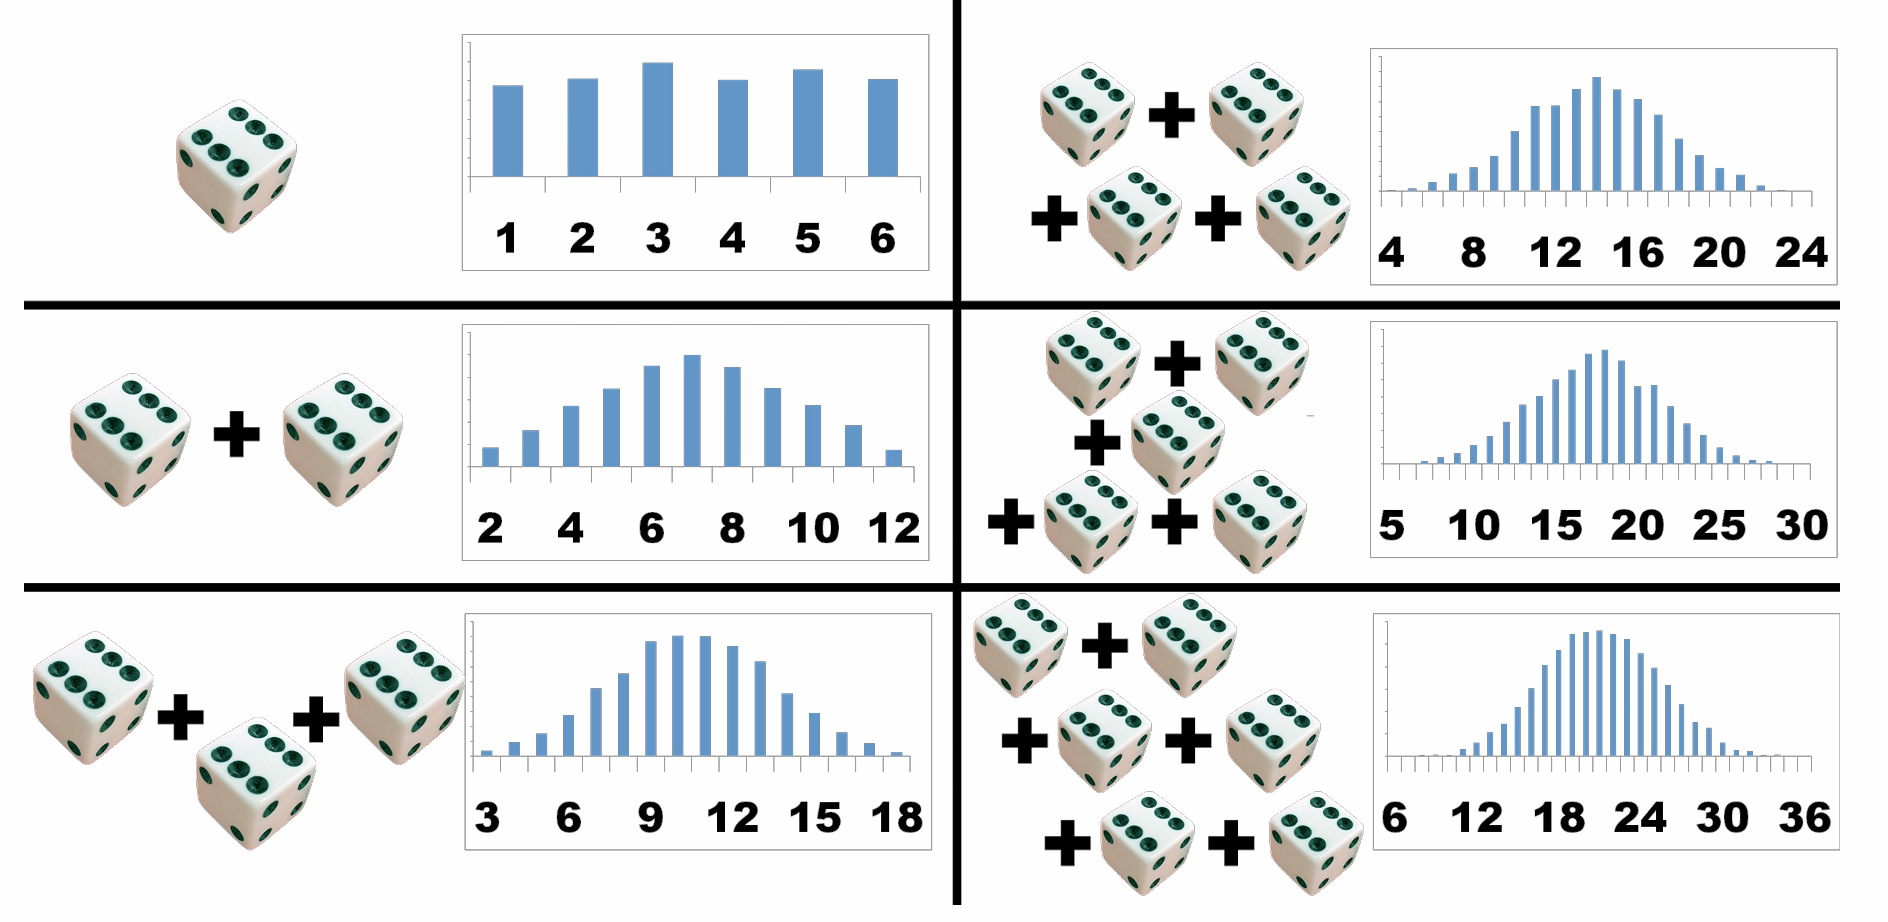


Each die roll is a uniform random variable D ~ Uniform(1, 6)

The sum of samples D1, ..., Dn is also a random variable

Hence the sample mean is yet another random variable:
- M = S / n

Claim: S, and hence M, are normally distributed


CLT:
- Consider a population D with mean mu and variance sigma^2

1. The sum of n independent samples of D tends towards a normal distribution S
2. S has mean n * mu and variance n * sigma^2


In [8]:
def roll_dice(n, sides, trials):
    """Run trials of summing n dice with given number of sides
       Return an array of sums of length trials"""
    sums = []
    for i in range(trials):
        tot = 0
        for j in range(n):
            tot = tot + random.randint(1, sides)
        sums.append(tot)
    return sums

<>:23: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\s'
<>:23: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\s'
C:\Users\liamw\AppData\Local\Temp\ipykernel_36600\4228019288.py:23: SyntaxWarning: invalid escape sequence '\m'
  f"$\mu={mean:.2f}, \sigma={stdev:.2f}$"))
C:\Users\liamw\AppData\Local\Temp\ipykernel_36600\4228019288.py:23: SyntaxWarning: invalid escape sequence '\s'
  f"$\mu={mean:.2f}, \sigma={stdev:.2f}$"))


Empirical values of stdev (10,00 trials)
sum of 1 rolls, sigma = 1.70
sum of 2 rolls, sigma = 2.40
sum of 3 rolls, sigma = 2.97
sum of 4 rolls, sigma = 3.42
sum of 10 rolls, sigma = 5.31
sum of 100 rolls, sigma = 17.02

Values of mean predicted by CLT
sum of 1 rolls, sigma = 1.71
sum of 2 rolls, sigma = 2.42
sum of 3 rolls, sigma = 2.96
sum of 4 rolls, sigma = 3.42
sum of 10 rolls, sigma = 5.40
sum of 100 rolls, sigma = 17.08


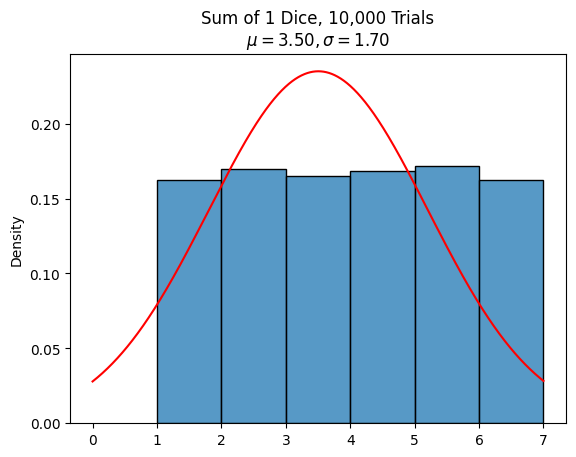

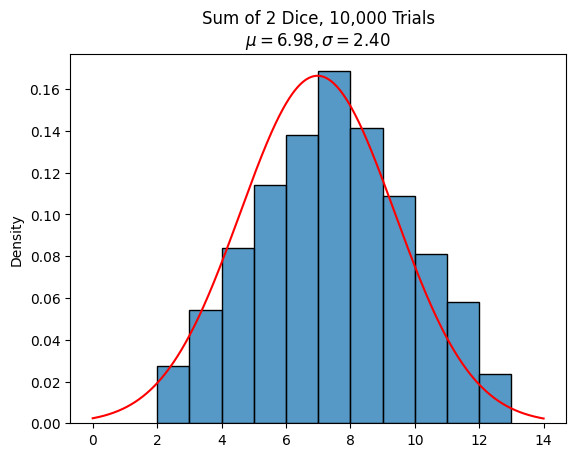

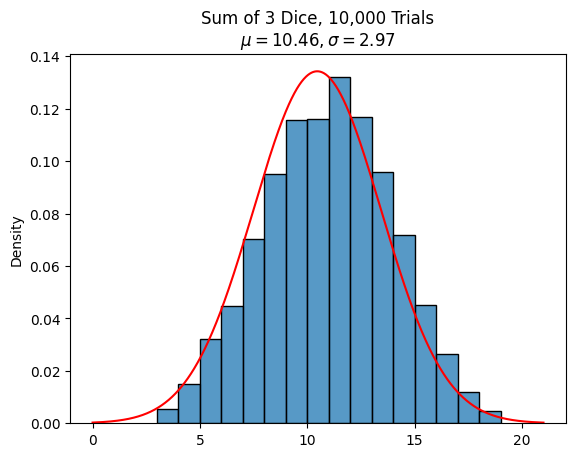

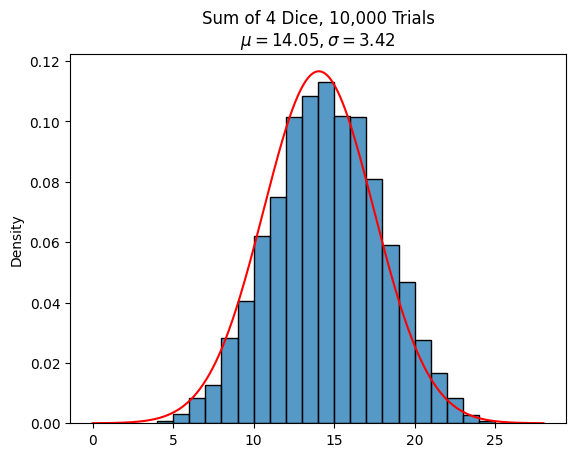

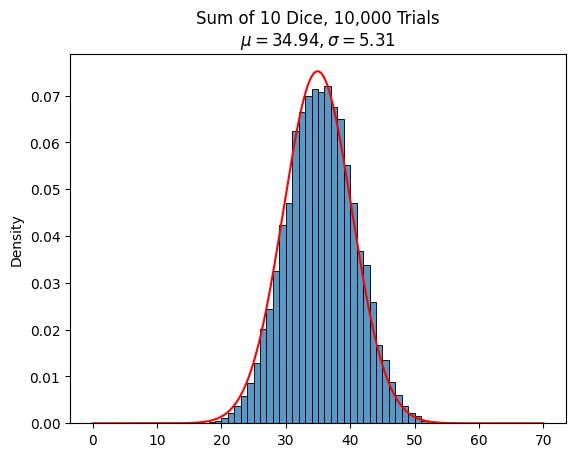

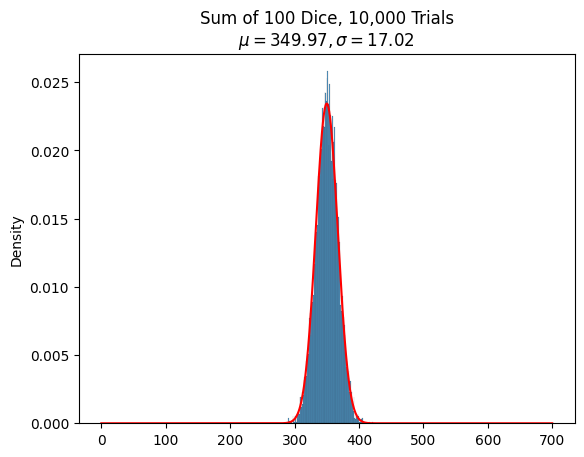

In [10]:
import seaborn as sns
import scipy
dice = (1, 2, 3, 4, 10, 100)
num_trials = 10_000

random.seed(1)
# print('Empirical values of mean (10,00 trials)')
print('Empirical values of stdev (10,00 trials)')
means, stds = [], []
for num_dice in dice:
    dice_sums = roll_dice(num_dice, 6, num_trials)
    mean = np.mean(dice_sums)
    stdev = np.std(dice_sums)
    means.append(mean)
    stds.append(stdev)
    # print(f"sum of {num_dice:,} rolls, mu = {mean:.2f}")
    print(f"sum of {num_dice:,} rolls, sigma = {stdev:.2f}")

    plt.figure()
    sns.histplot(dice_sums, binwidth=1, binrange=(num_dice, num_dice*6 + 1),
                  stat='density')
    plt.title((f"Sum of {num_dice:,} Dice, {num_trials:,} Trials\n"
                f"$\mu={mean:.2f}, \sigma={stdev:.2f}$"))
    rv = scipy.stats.norm(loc=mean, scale=stdev)
    x = np.linspace(0, 7*num_dice, 1000)
    pdf_vals = rv.pdf(x)
    plt.plot(x, pdf_vals, 'r')

# print('\nValues of mean and stdev predicted by CLT')
print('\nValues of mean predicted by CLT')
pred_means, pred_stds = [], []
for num_dice in dice:
    die_mean = sum(range(1,7))/6
    die_variance = (6**2 - 1) / 12 # discrete uniform dist with 6 values
    sum_mu = die_mean * num_dice
    pred_means.append(sum_mu)
    sum_variance = die_variance * num_dice
    sum_std = sum_variance**0.5
    pred_stds.append(sum_std)
    # print(f'sum of {num_dice:,} rolls, mu = {sum_mu:.2f}')
    print(f'sum of {num_dice:,} rolls, sigma = {sum_std:.2f}')

The mean of n independent samples of D tends towards a normal distributoion M

M has mean mu and variance sigma^2 / n

## SO WHAT?

The CLT tells us that the sample mean M is (or very well approximates being) normally distributed
- So,m we are justified in using the empirical rule to determine a confidence interval based on outcome m from M

Furthermore, the CLT tells us which normal distribution M converges to
- The mean muM is equal to the mean mu of the populatiuon D, so a sampled m is an unbiased estimate of mu
- The standard deviation sigmaM is known as M's standard error (SEM)

Summarizing
1. It doesn't matter the shape of the distribution individual outcomes happens to be
2. We can use CLT to estimate the mean of a population
3. This allows us to use empriircal rule wqhen computing confidence intervals

***Using CLT***
- Given a sufficiently large sample

1. Its mean comes from a distribution that apporximates a normal distribution
2. This normal distribution will have a mean close to the mean of the population
3. The variance of the sample means will be close to the variance of the population divided by the sample size


Estimating a Mean
1. Choose a sample size
2. Obtain a single random sample from the population
3. Compute the mean and standard deviation of that sample set
4. Calculate standard error of the sample mean 
- This is st dev of population divided by sample size (how do we know st dev of population)
5. Use empirical rule to generate a confidence interval around the sample mean for the whole population
6. If interval is too wide, increase sample size

Rolling 10 die:
- Population variance = 6^2 - 1 / 12 = 35/12
- SEM is sqrt(35/12) * 1/sqrt(10)

To calculate a 95% confidence interval

muM - 1.96 * 0.54, muM + 1.96 * 0.54

This is wrong


What we tested was whether a point estimate was within 1.96 SEMS of the true expected value

What we should expect is that 95% of the time we throw n dice, the mean value will be within 1.96 SEMs of the true expected value




**Sample SD vs. Population SD**
- Once sample reaches a reasonable size, sample's standard deviation is a pretty good approximation to population's standard deviation
- This depends on the skew

***Skew***
- A measure of asymmetry of data around the mean
- - Are they more spread out on one side of the mean

1. Positive (right) skew
- Tail on the right
- Mean greater than median

2. Negative (left) skew
- Tail for lower values is longer
- Peak shifted towards right
- Mean is less than median

The more skewed a distribution, the more samples needed for SDs to converge


Sample size matters (helps with convergence) --> population does not

Updated

Estimating a Mean
1. Choose a sample size
2. Obtain a single random sample from the population
3. Compute the mean and standard deviation of that sample set
4. Calculate standard error of the sample mean 
- This is st dev of population divided by sample size
- If we don't have st dev of population use st dev of sample
5. Use empirical rule to generate a confidence interval around the sample mean for the whole population
6. If interval is too wide, increase sample size

CLT for polling

0 is vote for Andrew
1 is vote for John

This poll is like taking a sample of coin flips (Bernoulli trials)

Average of opinions m = mu (sample) is the sample mean

Because we are taking a mean of individual bernoulli outcomes, clt applies

Poll includes 1,000 people and 540 prefer John

variance = 1/1000 * (540 * (1 - 0.54)^2 + 460 * (.54)^2)
sigma = 0.4958

SEM = 0.498/sqrt(1000) = 1.6%

Multiply by 1.96 to get 95% confidence interval

### Working Backwards

We want our polling accuracy to be +- 5 points while preserving 95% confidence

For binary polling, worst case is sigma (population) is 0.5

CLT tells us that repeated sample means will be normally distributed
- sigma (sample) = sigma(population) / sqrt(n) <= 0.5 / sqrt(n)
- By empirical rule, 95% confidence interval is +- 1.96 * sigma (m)
- Solve for < 5% error and we get n > 384 people


# Recap
1. Using Monte Carlo simulation to build models
- The world is mostly stochastic
- - But useful tool even when randomness is not preent
- Assessing reliability of results
- - Don't confuse statistical assertions with factual assertions

2. Building models of data, curve fitting
- Avoiding overfitting
- Validating the model

3. Understanding populations
- Cannot examine all members
- Rely on sampling
- Estimating validity of conclusions based on samples
- CLT lets us use a single sample and still assert inferences with specific confidence levels

Goal was to use computation to help intuition